In [3]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Política de precisión mixta establecida a 'mixed_float16'. Nota: Esto acelera principalmente en GPUs.
No se detectaron GPUs. El entrenamiento se realizará en CPU. Considera usar Transfer Learning para acelerar.
Primeras 5 filas del DataFrame:
                                                path  label
0  Z:\Trabajos\TrabajoTesis\dev_cruz_ml\app-cruz-...      0
1  Z:\Trabajos\TrabajoTesis\dev_cruz_ml\app-cruz-...      0
2  Z:\Trabajos\TrabajoTesis\dev_cruz_ml\app-cruz-...      0
3  Z:\Trabajos\TrabajoTesis\dev_cruz_ml\app-cruz-...      0
4  Z:\Trabajos\TrabajoTesis\dev_cruz_ml\app-cruz-...      0

Conteo de imágenes por clase:
label
0    198738
1     78786
Name: count, dtype: int64

Número de imágenes de entrenamiento: 166514
Número de imágenes de validación: 55505
Número de imágenes de prueba: 55505
Found 166514 validated image filenames.
Found 55505 validated image filenames.
Found 55505 validated image filenames.


C:\Users\leydy\AppData\Local\Temp\ipykernel_29424\2344625540.py:133: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 50, 50, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,593 (9.24 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 2,258,240 (8.61 MB)


Iniciando el entrenamiento del modelo (Transfer Learning). Esto será mucho más rápido en CPU...
Epoch 1/3


C:\Users\leydy\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2602/2602 ━━━━━━━━━━━━━━━━━━━━ 1629s 625ms/step - accuracy: 0.7842 - loss: 0.4888 - val_accuracy: 0.8231 - val_loss: 0.4027 - learning_rate: 0.0010
Epoch 2/3
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 710s 273ms/step - accuracy: 0.8175 - loss: 0.4165 - val_accuracy: 0.8128 - val_loss: 0.4204 - learning_rate: 0.0010
Epoch 3/3
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 708s 272ms/step - accuracy: 0.8162 - loss: 0.4160 - val_accuracy: 0.8240 - val_loss: 0.4027 - learning_rate: 0.0010
Entrenamiento del modelo finalizado.

--- Evaluación del Modelo en el Conjunto de Prueba ---
868/868 ━━━━━━━━━━━━━━━━━━━━ 306s 352ms/step - accuracy: 0.8264 - loss: 0.4008
Pérdida en el conjunto de prueba: 0.4003
Precisión en el conjunto de prueba: 0.8263

Realizando predicciones en el conjunto de prueba...
868/868 ━━━━━━━━━━━━━━━━━━━━ 174s 200ms/step
Predicciones completadas.

--- Matriz de Confusión ---


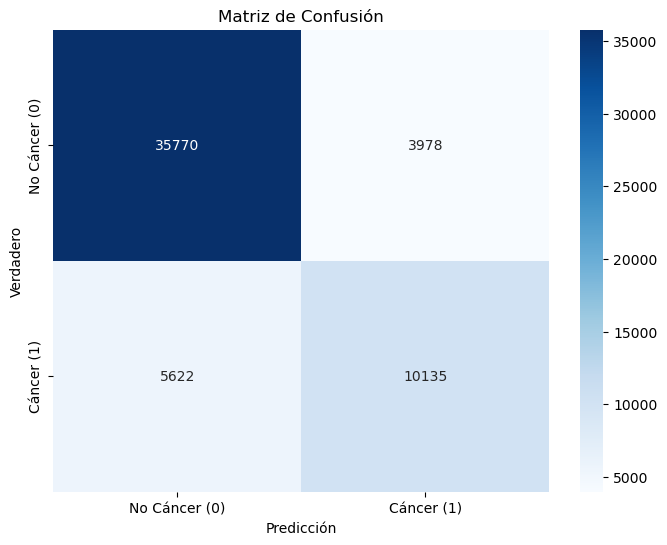


--- Reporte de Clasificación ---
              precision    recall  f1-score   support

   No Cáncer       0.86      0.90      0.88     39748
      Cáncer       0.72      0.64      0.68     15757

    accuracy                           0.83     55505
   macro avg       0.79      0.77      0.78     55505
weighted avg       0.82      0.83      0.82     55505



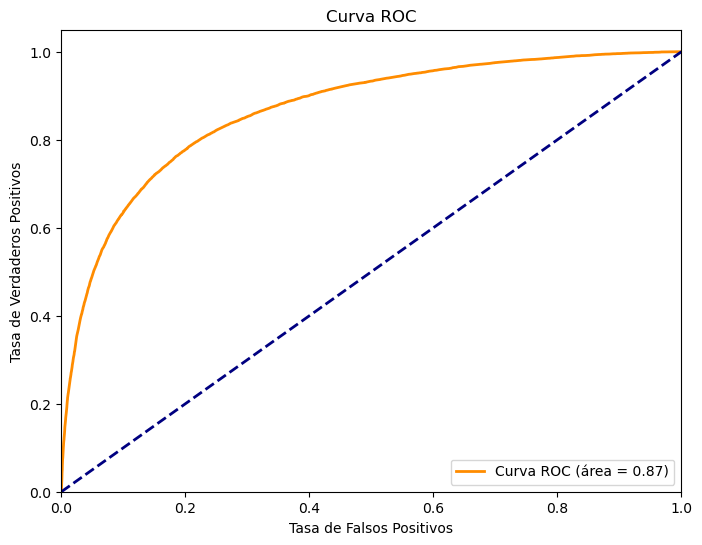

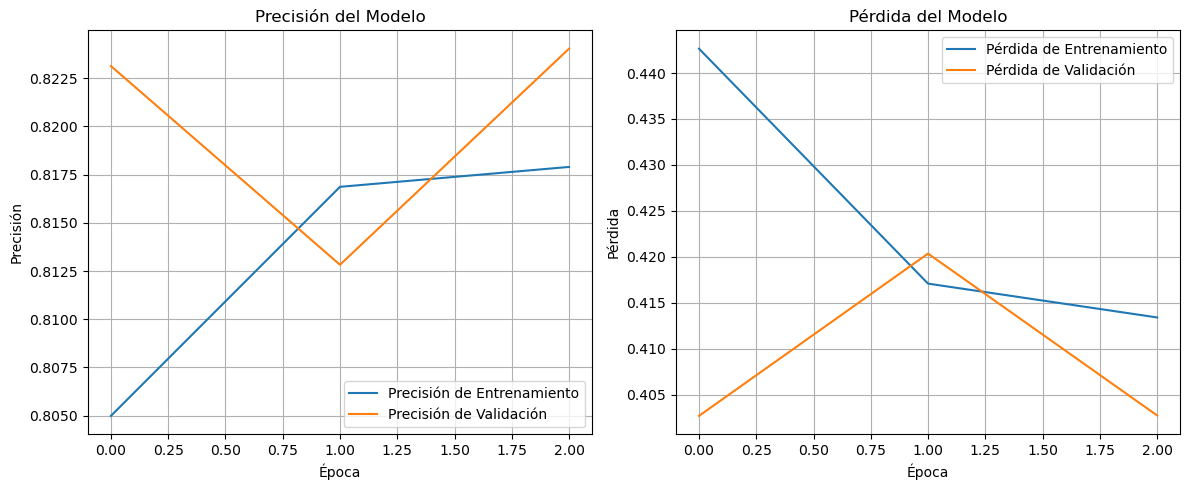


Modelo guardado exitosamente en: Z:\Trabajos\TrabajoTesis\dev_cruz_ml\app-cruz-ml\ml-model\breast_cancer_detection_model_transfer.h5


In [4]:
# Importar las librerías necesarias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model # Importar Model para usar la API funcional
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
from tensorflow.keras.applications import MobileNetV2 # Importar MobileNetV2

# --- 0. Configuración de Aceleración y Verificación de Hardware ---

# Habilitar mixed precision training para GPUs modernas.
# NOTA: Esta política NO tendrá efecto significativo en CPU, ya que las CPUs generalmente procesan en float32.
# Se mantiene aquí por si en el futuro se ejecuta en un entorno con GPU.
mixed_precision.set_global_policy('mixed_float16')
print("Política de precisión mixta establecida a 'mixed_float16'. Nota: Esto acelera principalmente en GPUs.")

# Verificar si TensorFlow está usando la GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPUs detectadas y configuradas: {gpus}")
    except RuntimeError as e:
        print(e)
else:
    print("No se detectaron GPUs. El entrenamiento se realizará en CPU. Considera usar Transfer Learning para acelerar.")

# --- 1. Configuración de Rutas y Parámetros ---
data_dir = r"Z:\Trabajos\TrabajoTesis\dev_cruz_ml\app-cruz-ml\ml-model\data"

IMG_SIZE = 50 # Las imágenes son de 50x50 píxeles
BATCH_SIZE = 64 # Mantener o probar con 128 si la RAM lo permite
EPOCHS = 3 # ¡Cambiado a 3 épocas!

# --- 2. Preparación de los Datos ---
image_paths = []
labels = []

for patient_id in os.listdir(data_dir):
    patient_path = os.path.join(data_dir, patient_id)
    if os.path.isdir(patient_path):
        for label_folder in os.listdir(patient_path):
            label_path = os.path.join(patient_path, label_folder)
            if os.path.isdir(label_path):
                label = int(label_folder)
                for image_name in os.listdir(label_path):
                    if image_name.endswith('.png'):
                        image_full_path = os.path.join(label_path, image_name)
                        image_paths.append(image_full_path)
                        labels.append(label)

df = pd.DataFrame({'path': image_paths, 'label': labels})
print("Primeras 5 filas del DataFrame:")
print(df.head())
print("\nConteo de imágenes por clase:")
print(df['label'].value_counts())

# --- 3. División de Datos (Entrenamiento, Validación, Prueba) ---
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, stratify=train_df['label'])

print(f"\nNúmero de imágenes de entrenamiento: {len(train_df)}")
print(f"Número de imágenes de validación: {len(val_df)}")
print(f"Número de imágenes de prueba: {len(test_df)}")

# --- 4. Aumento de Datos y Generadores de Imágenes ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Crear generadores de datos con paralización para acelerar la carga de datos
# `workers` y `use_multiprocessing` son cruciales para el rendimiento en CPU.
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='raw',
    seed=42,
    workers=os.cpu_count(),
    use_multiprocessing=True
)

validation_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='raw',
    seed=42,
    workers=os.cpu_count(),
    use_multiprocessing=True
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='raw',
    shuffle=False,
    seed=42,
    workers=os.cpu_count(),
    use_multiprocessing=True
)

# --- 5. Construcción del Modelo con Transfer Learning (MobileNetV2) ---

# Cargar el modelo base pre-entrenado (MobileNetV2)
# 'weights="imagenet"' carga los pesos entrenados en ImageNet
# 'include_top=False' excluye las capas de clasificación superiores, ya que construiremos las nuestras
# 'input_shape' debe coincidir con el target_size de tus imágenes y 3 canales de color
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Congelar las capas del modelo base para que no se reentrenen
base_model.trainable = False

# Crear un nuevo modelo sobre el modelo base
# Se usa la API funcional de Keras para construir un modelo más flexible
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False) # Important: set training=False when calling the base model
x = tf.keras.layers.GlobalAveragePooling2D()(x) # Reduce la dimensionalidad de las características

# Añadir capas densas para la clasificación específica de tu problema
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x) # Capa de salida para clasificación binaria

model = Model(inputs, outputs)

# Compilar el modelo
# Para Transfer Learning, a menudo se usa una tasa de aprendizaje más baja para las nuevas capas
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Mostrar un resumen del modelo. Notarás que el número de parámetros entrenables es mucho menor.
model.summary()

# --- 6. Callbacks para el Entrenamiento ---
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001,
    verbose=1
)

# --- 7. Entrenamiento del Modelo ---
print("\nIniciando el entrenamiento del modelo (Transfer Learning). Esto será mucho más rápido en CPU...")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)
print("Entrenamiento del modelo finalizado.")

# --- 8. Evaluación del Modelo ---
print("\n--- Evaluación del Modelo en el Conjunto de Prueba ---")
loss, accuracy = model.evaluate(test_generator)
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

print("\nRealizando predicciones en el conjunto de prueba...")
predictions = model.predict(test_generator)
# CORRECCIÓN: Obtener las etiquetas verdaderas directamente del DataFrame de prueba
y_true = test_df['label'].values # <-- CAMBIO CLAVE AQUÍ
print("Predicciones completadas.")

print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cáncer (0)', 'Cáncer (1)'],
            yticklabels=['No Cáncer (0)', 'Cáncer (1)'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

print("\n--- Reporte de Clasificación ---")
print(classification_report(y_true, y_pred_classes, target_names=['No Cáncer', 'Cáncer']))

fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# --- 9. Visualización del Historial de Entrenamiento ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- 10. Guardar el Modelo ---
model_save_path = r"Z:\Trabajos\TrabajoTesis\dev_cruz_ml\app-cruz-ml\ml-model\breast_cancer_detection_model_transfer.h5"
model.save(model_save_path)
print(f"\nModelo guardado exitosamente en: {model_save_path}")

# --- 11. Función de Predicción para una Nueva Imagen (Opcional) ---
def predict_single_image(image_path, model, img_size):
    from tensorflow.keras.preprocessing import image
    try:
        img = image.load_img(image_path, target_size=(img_size, img_size))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        prediction_proba = model.predict(img_array)[0][0]
        prediction_label = "Cáncer de Mama (IDC Positivo)" if prediction_proba > 0.5 else "No Cáncer (IDC Negativo)"

        print(f"Predicción para {os.path.basename(image_path)}:")
        print(f"Probabilidad de Cáncer: {prediction_proba:.4f}")
        print(f"Resultado: {prediction_label}")

        return prediction_proba, prediction_label
    except Exception as e:
        print(f"Error al procesar la imagen {image_path}: {e}")
        return None, None
